In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.coordinates import SkyCoord

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
f = open("data/temp.txt", "w")

with open("data/Dataset.txt") as file:
    for line in file:
        if line[0] != '#':
            f.write(line)

f.close()

In [3]:
raw_df = pd.read_csv('data/temp.txt', header=None, delimiter=r"\s+")
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,6954.4673,1738.9973,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,0.9999,0.0085,1,1,-1.0,205.524050,28.341480,R0000001,1
1,7111.1323,1756.4988,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,0.9991,-0.0041,1,1,-1.0,205.522096,28.341672,R0000002,1
2,6884.0669,1784.6356,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,0.9997,-0.0023,1,1,-1.0,205.524928,28.341980,R0000003,1
3,6604.6484,1786.4238,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,1.0000,0.0086,1,1,-1.0,205.528412,28.342000,R0000004,1
4,7284.2275,1819.0413,-99.9999,99.9999,0.0,9.9999,0,0,-99.9999,99.9999,...,0.0,1.0000,0.0000,99,99,-1.0,205.519938,28.342358,R0000005,1


In [4]:
cols = [2,8,14,20,26,32,33,34,35]
df = raw_df.iloc[:,cols]
df.columns = ['f275w', 'f336w', 'f438w', 'f606w', 'f814w', 'prob', 'ra', 'dec', 'id']
df.describe()

,f275w,f336w,f438w,f606w,f814w,prob,ra,dec
count,199621.000000,199621.000000,199621.000000,199621.000000,199621.000000,199621.000000,199621.000000,199621.000000
mean,-20.770262,-8.363505,-8.390557,22.361134,21.434464,35.983431,205.547639,28.376351
std,59.867925,54.505959,54.276369,8.054891,7.722576,47.294623,0.016237,0.014153
min,-99.999900,-99.999900,-99.999900,-99.999900,-99.999900,-1.000000,205.509822,28.340981
25%,-99.999900,-99.999900,-99.999900,21.159400,20.510800,-1.000000,205.535806,28.366189
50%,21.428100,22.146700,22.281100,23.233600,22.206800,-1.000000,205.547975,28.376667
75%,26.051500,26.057700,25.366100,24.601000,23.380000,96.800000,205.559631,28.386789
max,28.958100,29.655600,28.873300,31.504600,30.860600,100.000000,205.584904,28.409850


In [5]:
df_bol = df.loc[df['f606w'] >= (22-5*np.log10(1040))]

In [6]:
B = df_bol['f438w']
V = df_bol['f606w']

In [35]:
d = 10.4 * 100
m_V = B['f606w'] - (5* np.log10(d)) 
m_V = m_V * -1

In [30]:
B = df_bol.loc[df_bol['f438w']>= -20]
# V = V.loc[V <= 10]

In [33]:
col_ind = B['f438w']-B['f606w']


In [31]:
B

,f275w,f336w,f438w,f606w,f814w,prob,ra,dec,id
83,19.7336,19.1845,19.6350,19.0066,18.5563,96.4,205.552568,28.347170,R0000084
93,19.7651,19.1469,19.5783,19.0561,18.5919,96.8,205.551394,28.347580,R0000094
94,17.1627,16.4142,16.4120,15.4551,15.1804,97.5,205.556762,28.347629,R0000095
95,-99.9999,26.3212,25.7852,28.5586,17.2976,-1.0,205.549609,28.347648,R0000096
99,19.6349,19.1156,19.5415,18.9347,18.4765,98.2,205.561437,28.347709,R0000100
102,19.4162,18.8070,19.2426,18.6414,18.1412,97.8,205.556696,28.347791,R0000103
104,19.7894,19.2225,19.6021,19.1019,18.6533,97.7,205.560831,28.347829,R0000105
105,17.3228,16.1864,16.2136,15.2493,14.6038,96.2,205.552637,28.347855,R0000106
110,19.4104,18.7785,19.1166,18.6104,18.1407,97.2,205.553763,28.348086,R0000111
113,19.4401,18.9050,19.2176,18.6969,18.2133,96.5,205.562551,28.348136,R0000114


In [51]:
def scatterPlot2D(x,y, title, xLabel, yLabel, alpha):
    fig = plt.figure(figsize=(15,10))

    plot = fig.add_subplot(111)
    plot.set_title("Subplot1")
    plot.set_xlabel(xLabel)
    plot.set_ylabel(yLabel)
    plot.scatter(x, y, s=1, c='r', label="feature1", alpha=alpha)
    plt.grid()

    plt.title(title)
    plt.legend(loc=2)
    plt.show()

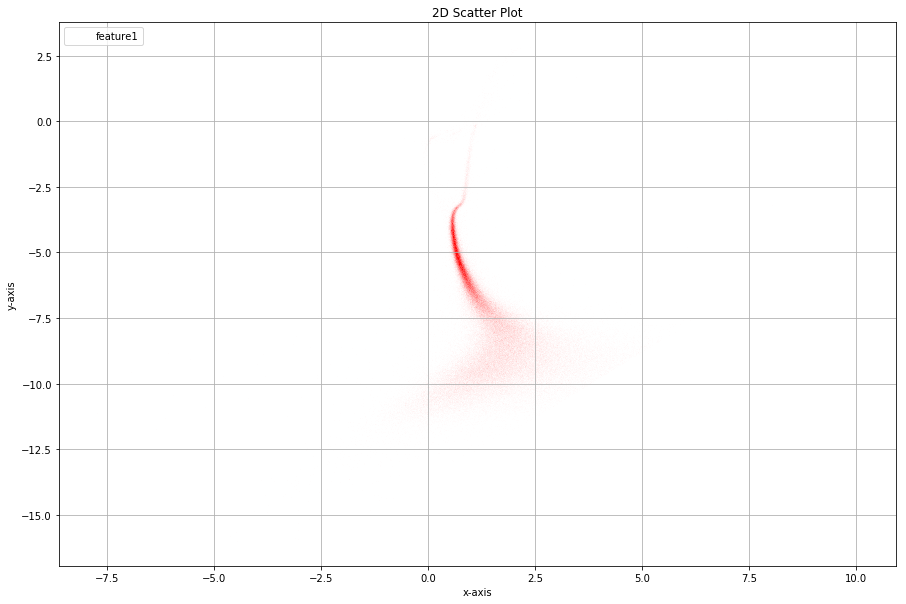

In [52]:
scatterPlot2D(col_ind,m_V,"2D Scatter Plot", "x-axis", "y-axis", 0.005)

In [40]:
tmp = pd.DataFrame({"c": col_ind, "m": m_V})

In [41]:
tmp1 = tmp.loc[(tmp['m']<=-2.5)&(tmp['m']>=-5)&(tmp['c']>=0)&(tmp['c']<=1.5)]

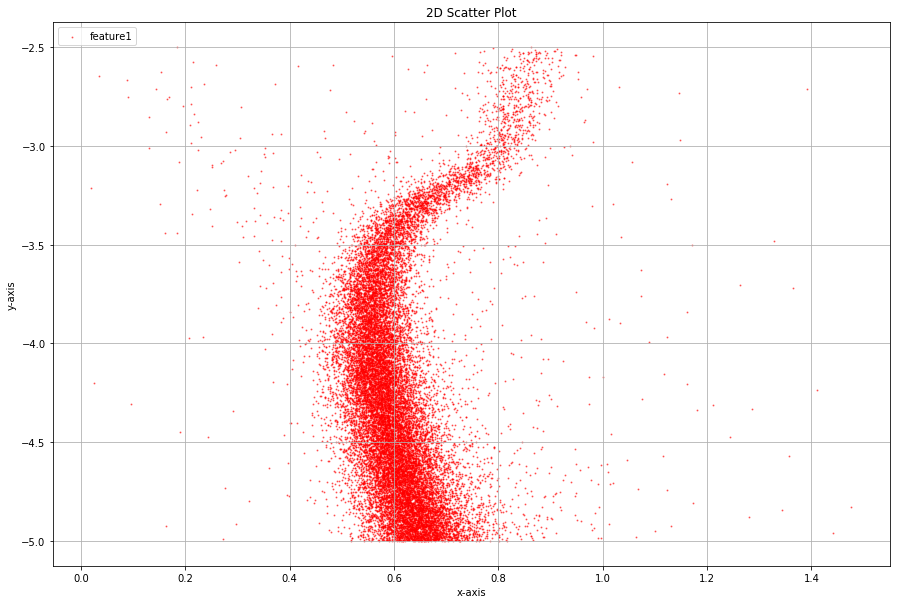

In [53]:
scatterPlot2D(tmp1['c'].values,tmp1['m'].values,"2D Scatter Plot", "x-axis", "y-axis", 0.5)

In [67]:
tmp2 = tmp1.loc[(tmp1['c']>=0.54)&(tmp1['c']<=0.56)&(tmp1['m']>=-3.7)&(tmp1['m']<=-3.5)]
row = df_bol.iloc[767]

In [68]:
row

f275w     19.8044
f336w     19.2178
f438w     19.5916
f606w     19.0475
f814w     18.5914
prob           97
ra        205.548
dec       28.3588
id       R0000785
Name: 779, dtype: object

In [71]:
main_mag_bol = row['f606w']

In [72]:
L_ratio = np.e**((4.8-main_mag_bol + 5*np.log10(d))/2.5)

In [73]:
L_ratio

1.398033601034543

In [74]:
M_sun = 1.9891e30

In [77]:
M_sun

1.9891e+30

In [78]:
M_star = (L_ratio ** (1/3.8)) * M_sun 

In [79]:
M_star

2.1724546793151348e+30

In [82]:
Age = ((M_star/M_sun) * (10) ) / L_ratio

In [83]:
Age

7.812256574653119

In [84]:
#Turn Off point Magnitude
print("Turn Off point Magnitude: ", main_mag_bol - 5*np.log10(d))

Turn Off point Magnitude:  3.9623333035060977


In [86]:
#Age
print("Approximate Age of The Cluster: ", Age, " Billion Years")

Approximate Age of The Cluster:  7.812256574653119  Billion Years
